In [241]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('./Portfolio-by-Location-by-Debt-Size.csv')
df

,Unnamed: 0,<5K,Unnamed: 2,5K to 10K,Unnamed: 4,10K to 20K,Unnamed: 6,20K to 40K,Unnamed: 8,40K to 60K,Unnamed: 10,60K to 80K,Unnamed: 12,80K to 100K,Unnamed: 14,100K to 200K,Unnamed: 16,200K+,Unnamed: 18
0,Location,Dollars Outstanding (in billions),Borrowers (in thousands),Dollars Outstanding (in billions),Borrowers (in thousands),Dollars Outstanding (in billions),Borrowers (in thousands),Dollars Outstanding (in billions),Borrowers (in thousands),Dollars Outstanding (in billions),Borrowers (in thousands),Dollars Outstanding (in billions),Borrowers (in thousands),Dollars Outstanding (in billions),Borrowers (in thousands),Dollars Outstanding (in billions),Borrowers (in thousands),Dollars Outstanding (in billions),Borrowers (in thousands)
1,Alabama,$0.28,102.9,$0.76,104.1,$1.84,126.7,$3.95,138.2,$3.29,66.8,$2.84,41.2,$1.97,22.2,$5.25,37.8,$3.70,13.3
2,Alaska,$0.03,11.9,$0.09,12.0,$0.20,13.9,$0.40,14.0,$0.32,6.4,$0.27,3.9,$0.17,1.9,$0.46,3.3,$0.43,1.5
3,Arizona,$0.42,152.7,$1.21,164.0,$2.70,187.8,$5.29,186.0,$4.15,84.5,$3.39,49.2,$2.29,25.7,$6.08,44.2,$6.18,20.1
4,Arkansas,$0.19,69.0,$0.50,68.9,$1.17,80.6,$2.34,82.3,$1.92,38.9,$1.66,24.1,$1.16,13.0,$2.61,19.0,$1.69,6.0
5,California,$1.70,604.6,$5.47,737.4,$12.60,876.8,$22.92,813.0,$15.75,321.9,$12.60,182.7,$9.43,105.7,$30.29,217.0,$35.93,117.3
6,Colorado,$0.33,118.5,$0.93,126.5,$2.31,158.7,$5.08,178.9,$3.90,79.4,$3.21,46.6,$2.15,24.2,$5.80,41.9,$5.11,17.5
7,Connecticut,$0.20,72.2,$0.63,86.1,$1.60,109.6,$3.43,122.4,$2.28,46.4,$1.87,27.1,$1.33,15.0,$3.76,27.3,$3.24,11.0
8,Delaware,$0.05,19.2,$0.16,22.0,$0.39,26.8,$0.84,29.7,$0.61,12.4,$0.54,7.9,$0.40,4.5,$1.15,8.3,$0.85,3.0
9,District of Columbia,$0.04,14.0,$0.12,16.1,$0.30,20.8,$0.69,24.0,$0.60,12.1,$0.56,8.1,$0.46,5.2,$1.71,12.1,$1.88,6.5


In [242]:
states = []
for id, i in enumerate(df['Unnamed: 0']):
    if id == 0: continue
    states.append(i.upper())
print(states)

['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA', 'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'PUERTO RICO', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN', 'WYOMING', 'OTHER', 'NOT REPORTED']


In [243]:
amount_lent = {}
borrowers = {}
avg = {}

for i in df.columns:
    if i[0] == 'U': continue
    else:
        amount_lent[i] = []
        borrowers[i] = []
        avg[i] = []

slabs = list(borrowers.keys())

for i in range(1, 55):
    for id, j in enumerate(df.loc[i, :]):
        if id < 1: continue
        else:
            if (id % 2 == 0): borrowers[slabs[(id // 2) - 1]].append(float(j))
            else: amount_lent[slabs[(id - 1) // 2]].append(float(j[1:]))

for i in slabs:
    for id, j in enumerate(amount_lent[i]):
        avg[i].append(amount_lent[i][id] * 1000 / borrowers[i][id])

avg_df = pd.DataFrame(avg, index=states)
amount_lent_df = pd.DataFrame(amount_lent, index=states)
borrowers_df = pd.DataFrame(borrowers, index=states)

In [244]:
borrowers_df.head()

,<5K,5K to 10K,10K to 20K,20K to 40K,40K to 60K,60K to 80K,80K to 100K,100K to 200K,200K+
ALABAMA,102.9,104.1,126.7,138.2,66.8,41.2,22.2,37.8,13.3
ALASKA,11.9,12.0,13.9,14.0,6.4,3.9,1.9,3.3,1.5
ARIZONA,152.7,164.0,187.8,186.0,84.5,49.2,25.7,44.2,20.1
ARKANSAS,69.0,68.9,80.6,82.3,38.9,24.1,13.0,19.0,6.0
CALIFORNIA,604.6,737.4,876.8,813.0,321.9,182.7,105.7,217.0,117.3


In [245]:
amount_lent_df.head()

,<5K,5K to 10K,10K to 20K,20K to 40K,40K to 60K,60K to 80K,80K to 100K,100K to 200K,200K+
ALABAMA,0.28,0.76,1.84,3.95,3.29,2.84,1.97,5.25,3.70
ALASKA,0.03,0.09,0.20,0.40,0.32,0.27,0.17,0.46,0.43
ARIZONA,0.42,1.21,2.70,5.29,4.15,3.39,2.29,6.08,6.18
ARKANSAS,0.19,0.50,1.17,2.34,1.92,1.66,1.16,2.61,1.69
CALIFORNIA,1.70,5.47,12.60,22.92,15.75,12.60,9.43,30.29,35.93


In [246]:
avg_df.head()

,<5K,5K to 10K,10K to 20K,20K to 40K,40K to 60K,60K to 80K,80K to 100K,100K to 200K,200K+
ALABAMA,2.721088,7.300672,14.522494,28.581766,49.251497,68.932039,88.738739,138.888889,278.195489
ALASKA,2.521008,7.500000,14.388489,28.571429,50.000000,69.230769,89.473684,139.393939,286.666667
ARIZONA,2.750491,7.378049,14.376997,28.440860,49.112426,68.902439,89.105058,137.556561,307.462687
ARKANSAS,2.753623,7.256894,14.516129,28.432564,49.357326,68.879668,89.230769,137.368421,281.666667
CALIFORNIA,2.811776,7.417955,14.370438,28.191882,48.928239,68.965517,89.214759,139.585253,306.308610


In [247]:
pie_charts_borrowers = []

for id in borrowers_df.index:
    if id == "CALIFORNIA" or id == "FLORIDA" or id == "NEW YORK" or id == "TEXAS" or id == "NOT REPORTED":
        temp = []
        temp.append(id)
        for i in borrowers_df.loc[id, :]:
            temp.append(i)
        pie_charts_borrowers.append(temp)

print(pie_charts_borrowers)

[['CALIFORNIA', 604.6, 737.4, 876.8, 813.0, 321.9, 182.7, 105.7, 217.0, 117.3], ['FLORIDA', 413.0, 453.2, 537.3, 570.2, 270.4, 161.1, 84.1, 152.6, 71.9], ['NEW YORK', 372.7, 409.8, 504.7, 567.1, 226.4, 129.1, 73.7, 143.8, 65.0], ['TEXAS', 627.5, 686.9, 809.4, 797.0, 356.1, 209.7, 110.1, 183.6, 61.6], ['NOT REPORTED', 795.4, 432.9, 493.6, 457.2, 198.9, 103.8, 59.6, 95.4, 29.3]]


In [248]:
pie_charts_amt = []

for id in amount_lent_df.index:
    if id == "CALIFORNIA" or id == "FLORIDA" or id == "NEW YORK" or id == "TEXAS" or id == "NOT REPORTED":
        temp = []
        temp.append(id)
        for i in amount_lent_df.loc[id, :]:
            temp.append(i)
        pie_charts_amt.append(temp)

print(pie_charts_amt)


[['CALIFORNIA', 1.7, 5.47, 12.6, 22.92, 15.75, 12.6, 9.43, 30.29, 35.93], ['FLORIDA', 1.15, 3.36, 7.76, 16.31, 13.29, 11.09, 7.49, 21.2, 21.64], ['NEW YORK', 1.03, 3.0, 7.34, 16.03, 11.08, 8.9, 6.57, 19.94, 19.42], ['TEXAS', 1.77, 5.06, 11.68, 22.62, 17.51, 14.43, 9.8, 25.26, 17.6], ['NOT REPORTED', 1.74, 3.16, 7.12, 13.05, 9.7, 7.16, 5.3, 12.83, 8.75]]


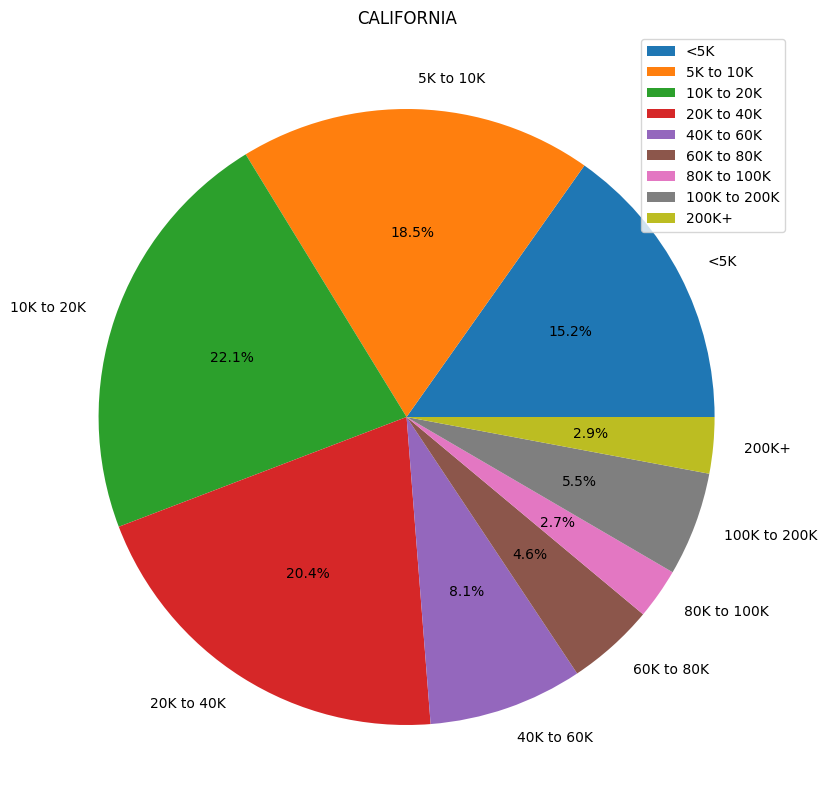

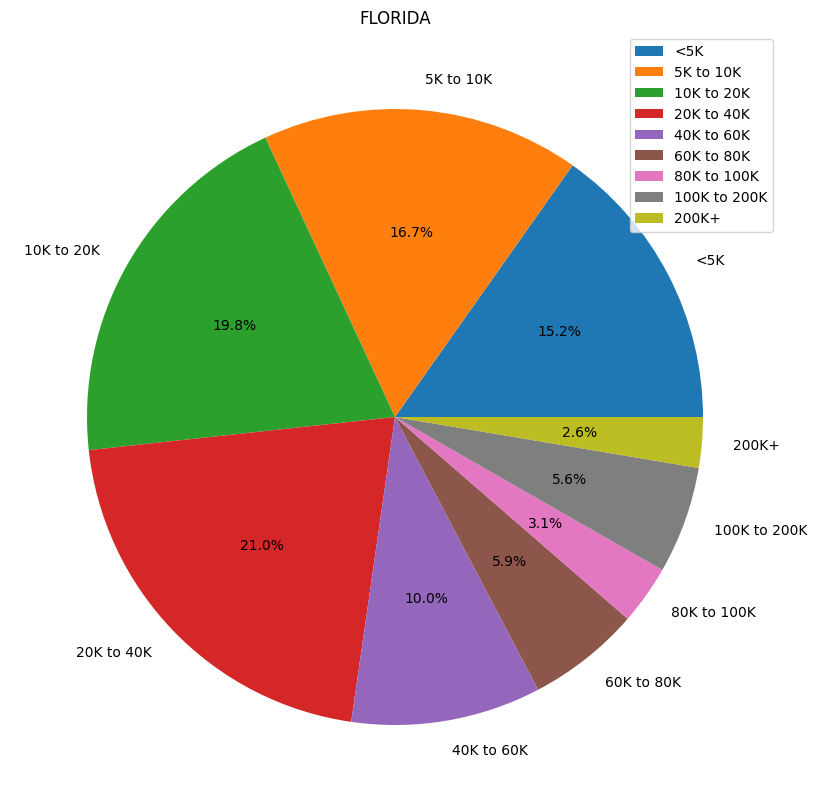

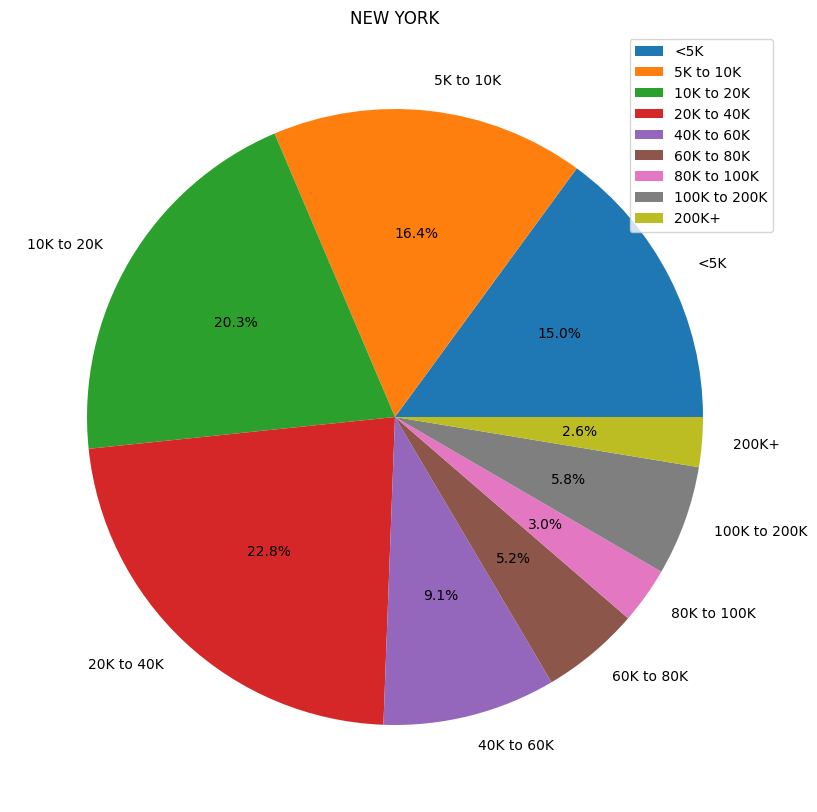

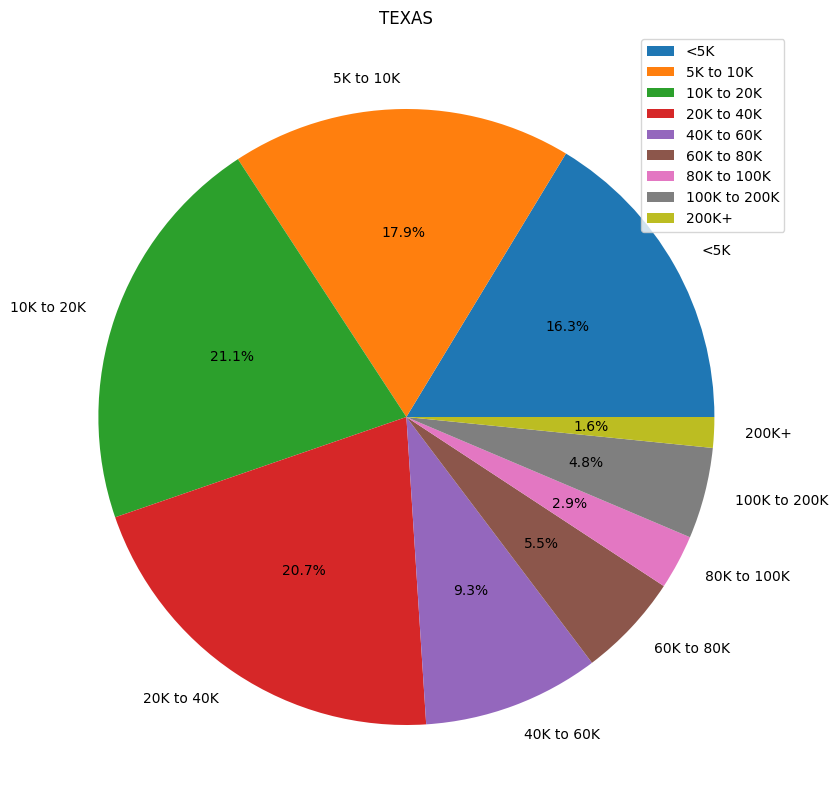

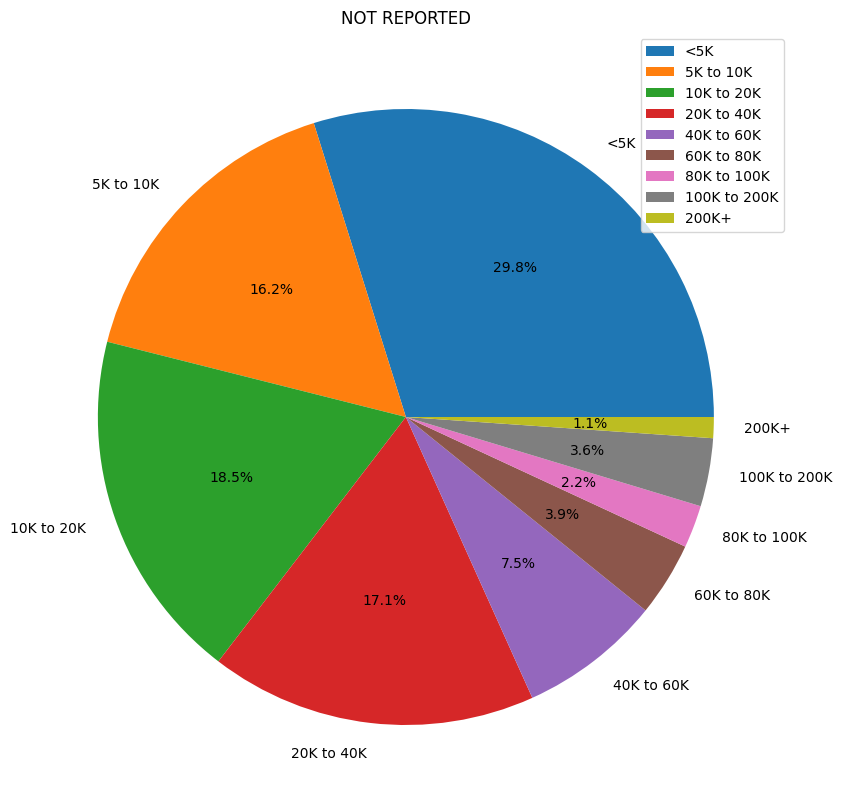

In [249]:
for i in range(len(pie_charts_borrowers)):
    plt.figure(figsize=(15, 10))
    plt.title(pie_charts_borrowers[i][0])
    plt.pie(pie_charts_borrowers[i][1:], labels=slabs, autopct='%1.1f%%')
    plt.legend(loc="upper right")
    plt.show()


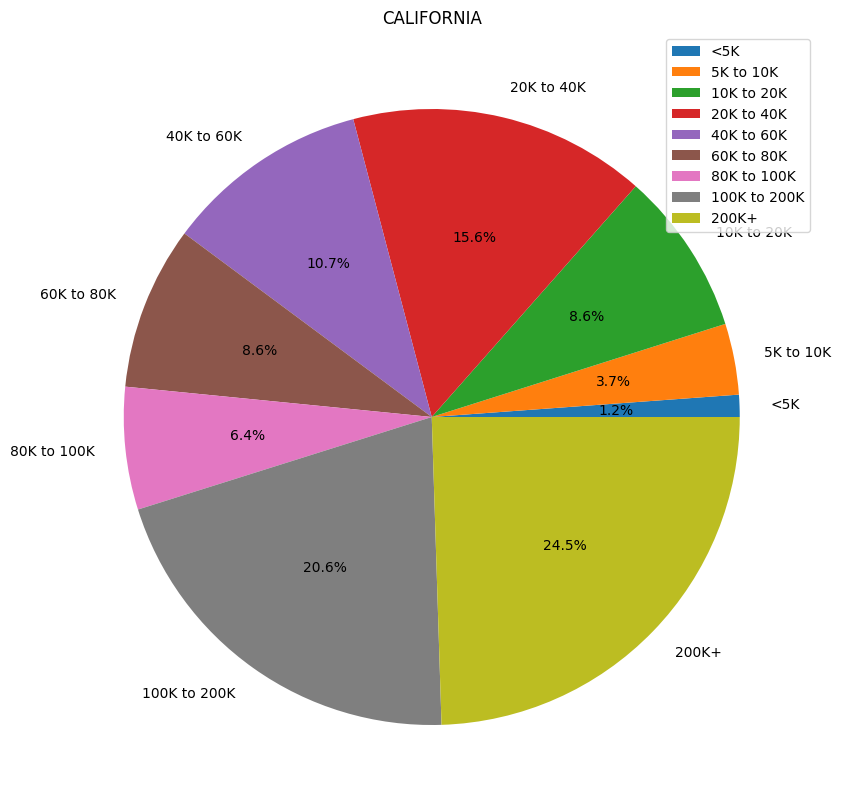

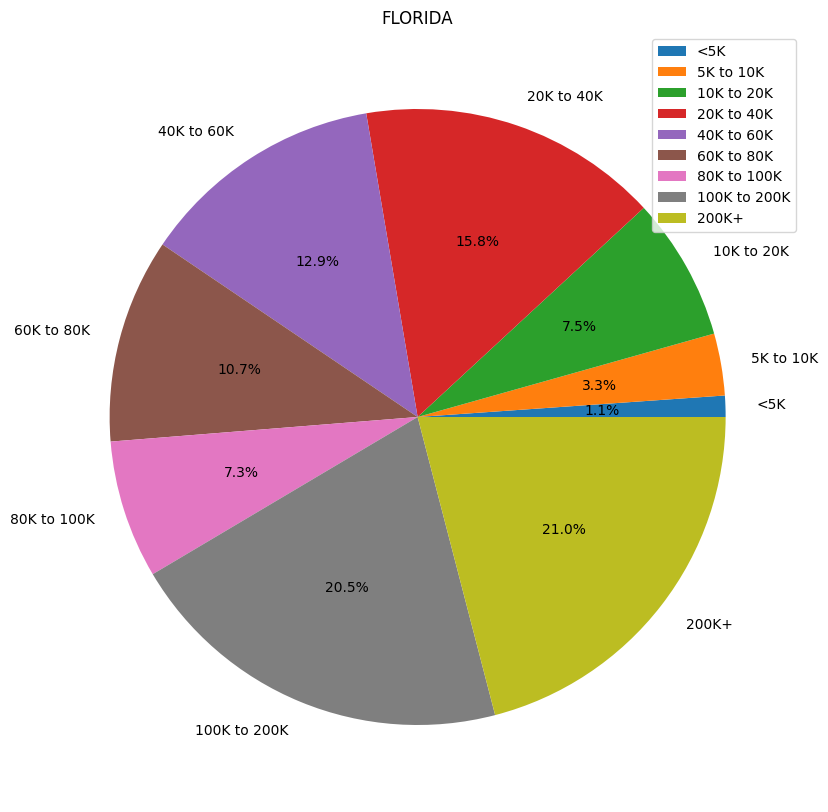

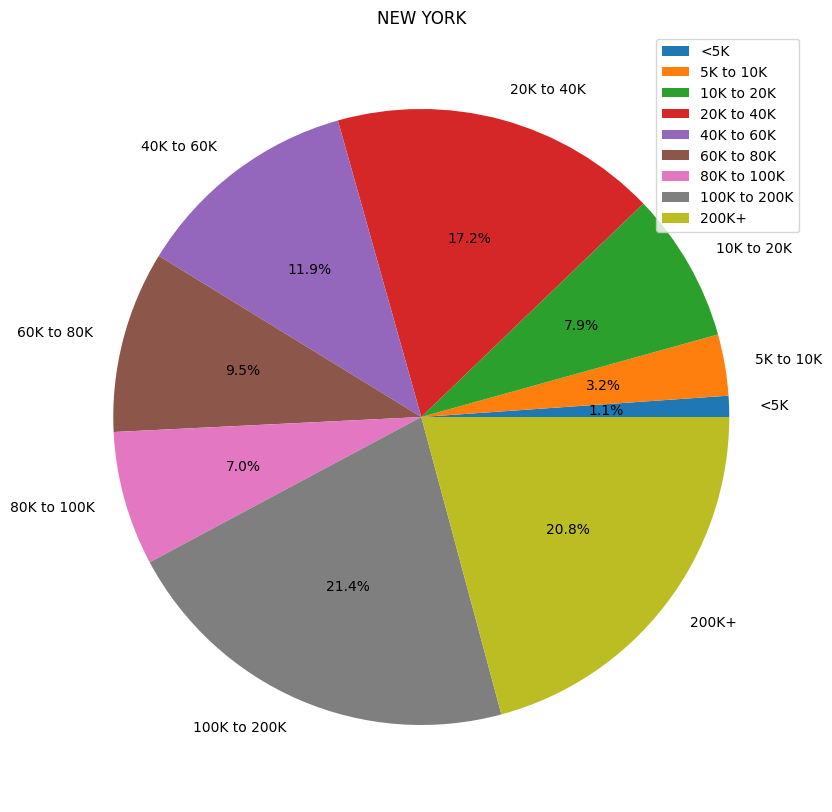

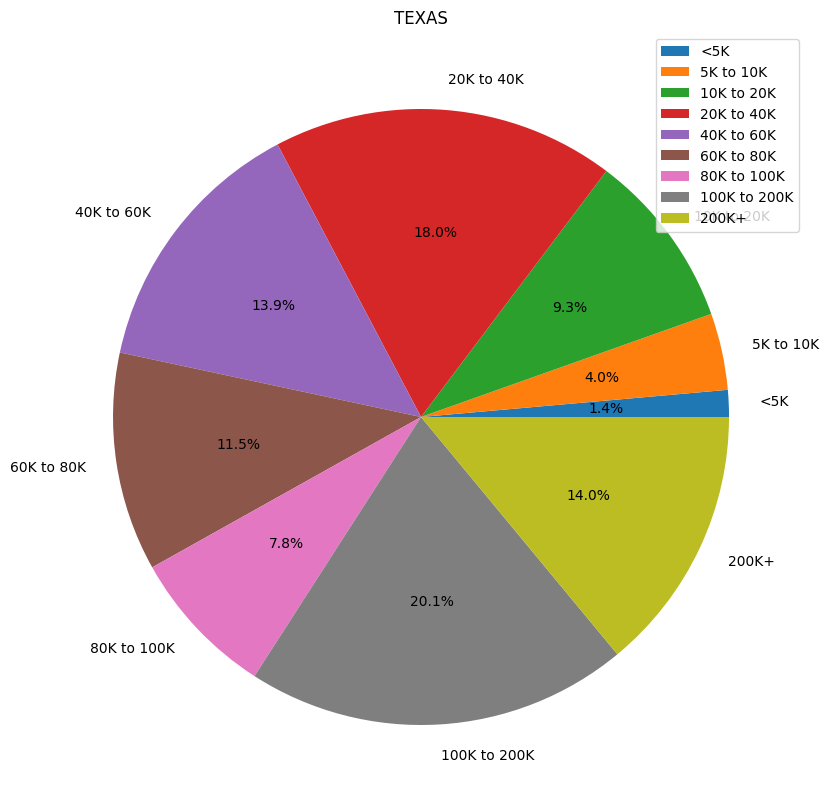

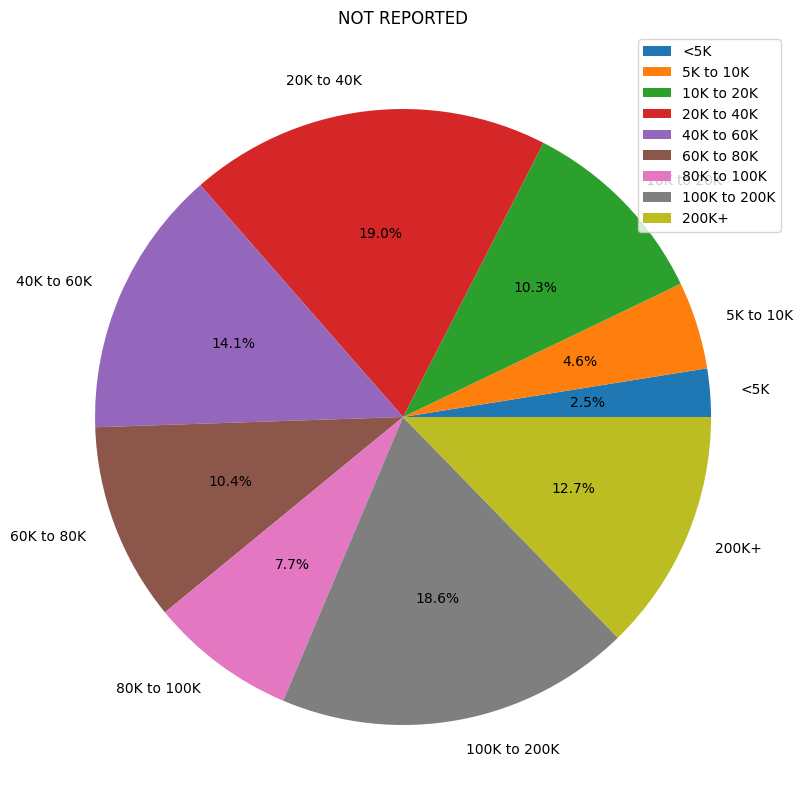

In [250]:
for i in range(len(pie_charts_amt)):
    plt.figure(figsize=(15, 10))
    plt.title(pie_charts_amt[i][0])
    plt.pie(pie_charts_amt[i][1:], labels=slabs, autopct='%1.1f%%')
    plt.legend(loc="upper right")
    plt.show()

In [251]:
total_borrowers = []

for id in borrowers_df.index:
    temp = 0
    for i in borrowers_df.loc[id, :]:
        if type(i) != float:
            continue
        temp += i
    total_borrowers.append(temp)

total_borrowers_df = pd.DataFrame(total_borrowers, index=states)
total_borrowers_df.head()

,0
ALABAMA,653.2
ALASKA,68.8
ARIZONA,914.2
ARKANSAS,401.8
CALIFORNIA,3976.4


In [252]:
total_amt = []

for id in amount_lent_df.index:
    temp = 0
    for i in amount_lent_df.loc[id, :]:
        if type(i) != float:
            continue
        temp += i
    total_amt.append(temp)

total_amt_df = pd.DataFrame(total_amt, index=states)
total_amt_df.head()

,0
ALABAMA,23.88
ALASKA,2.37
ARIZONA,31.71
ARKANSAS,13.24
CALIFORNIA,146.69


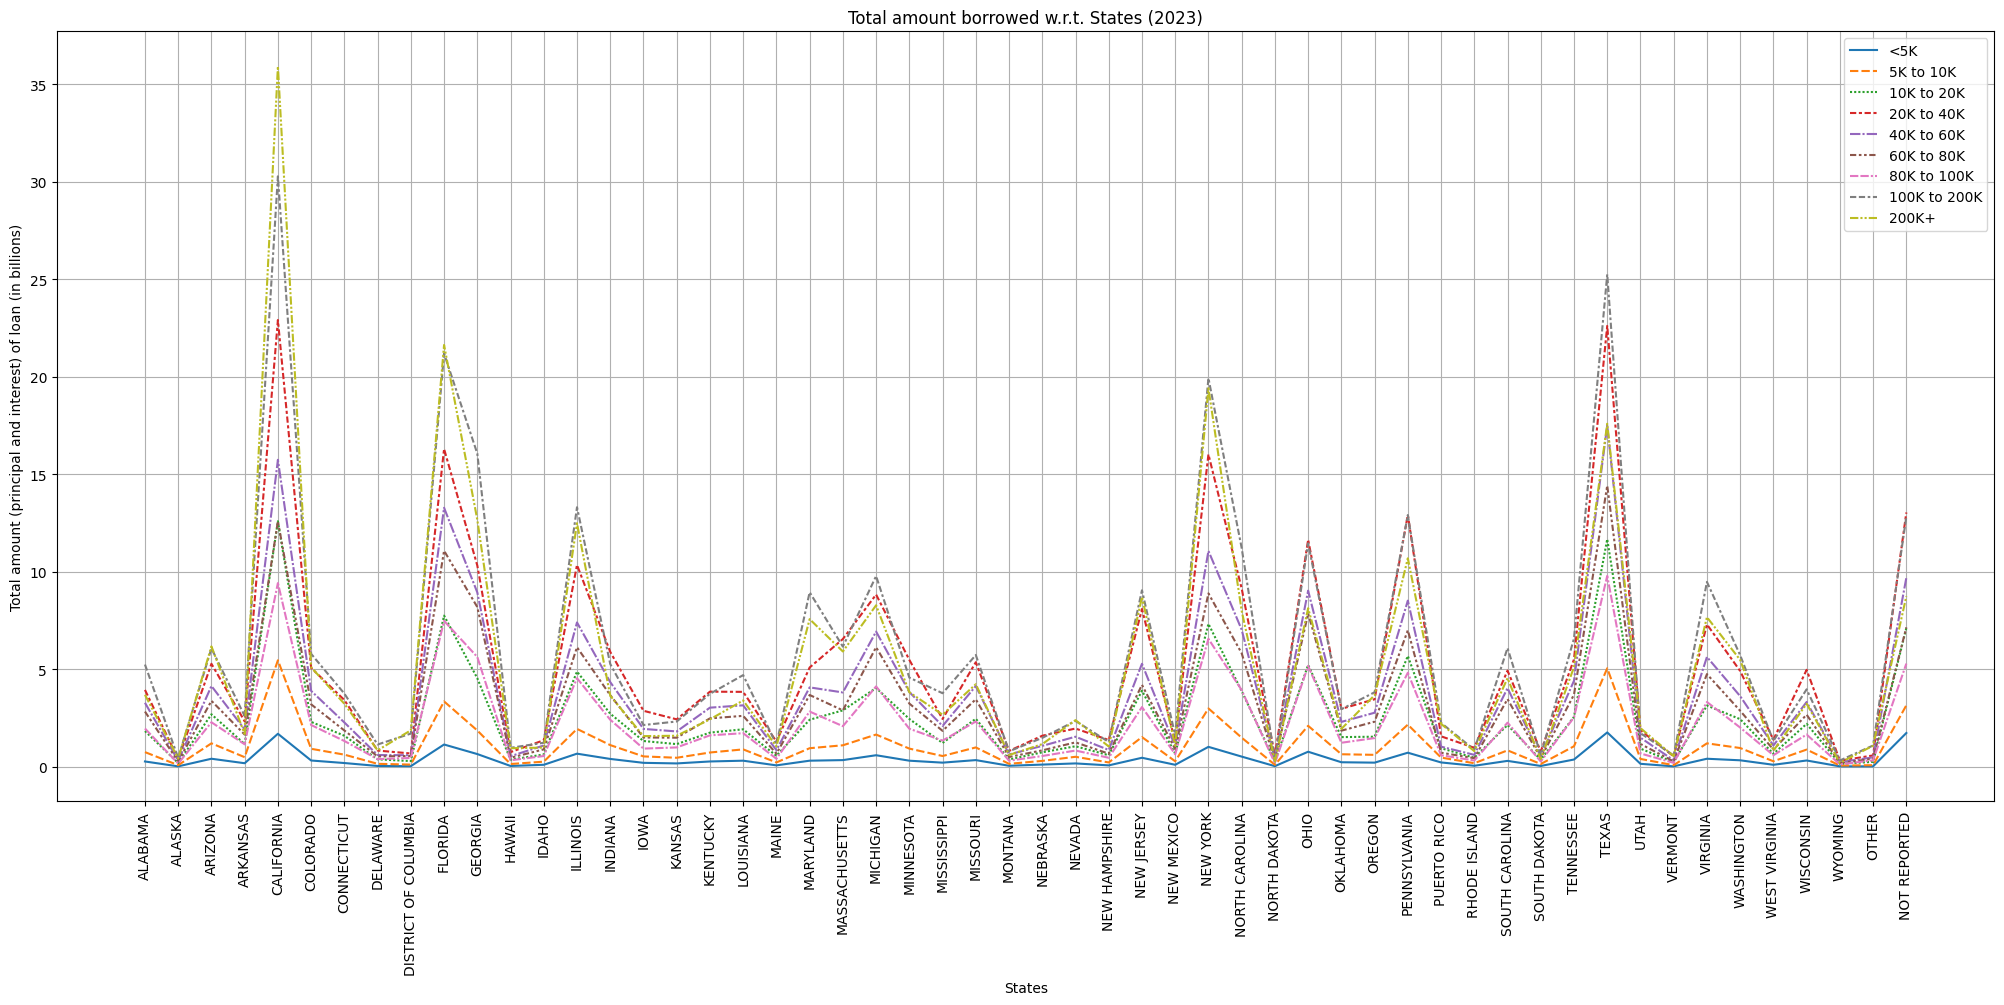

In [253]:
plt.figure(figsize=(25, 10))
sns.lineplot(data=amount_lent_df)
plt.title("Total amount borrowed w.r.t. States (2023)")
plt.ylabel("Total amount (principal and interest) of loan (in billions)")
plt.xlabel("States")
plt.xticks(rotation=90)
plt.grid()
plt.show()

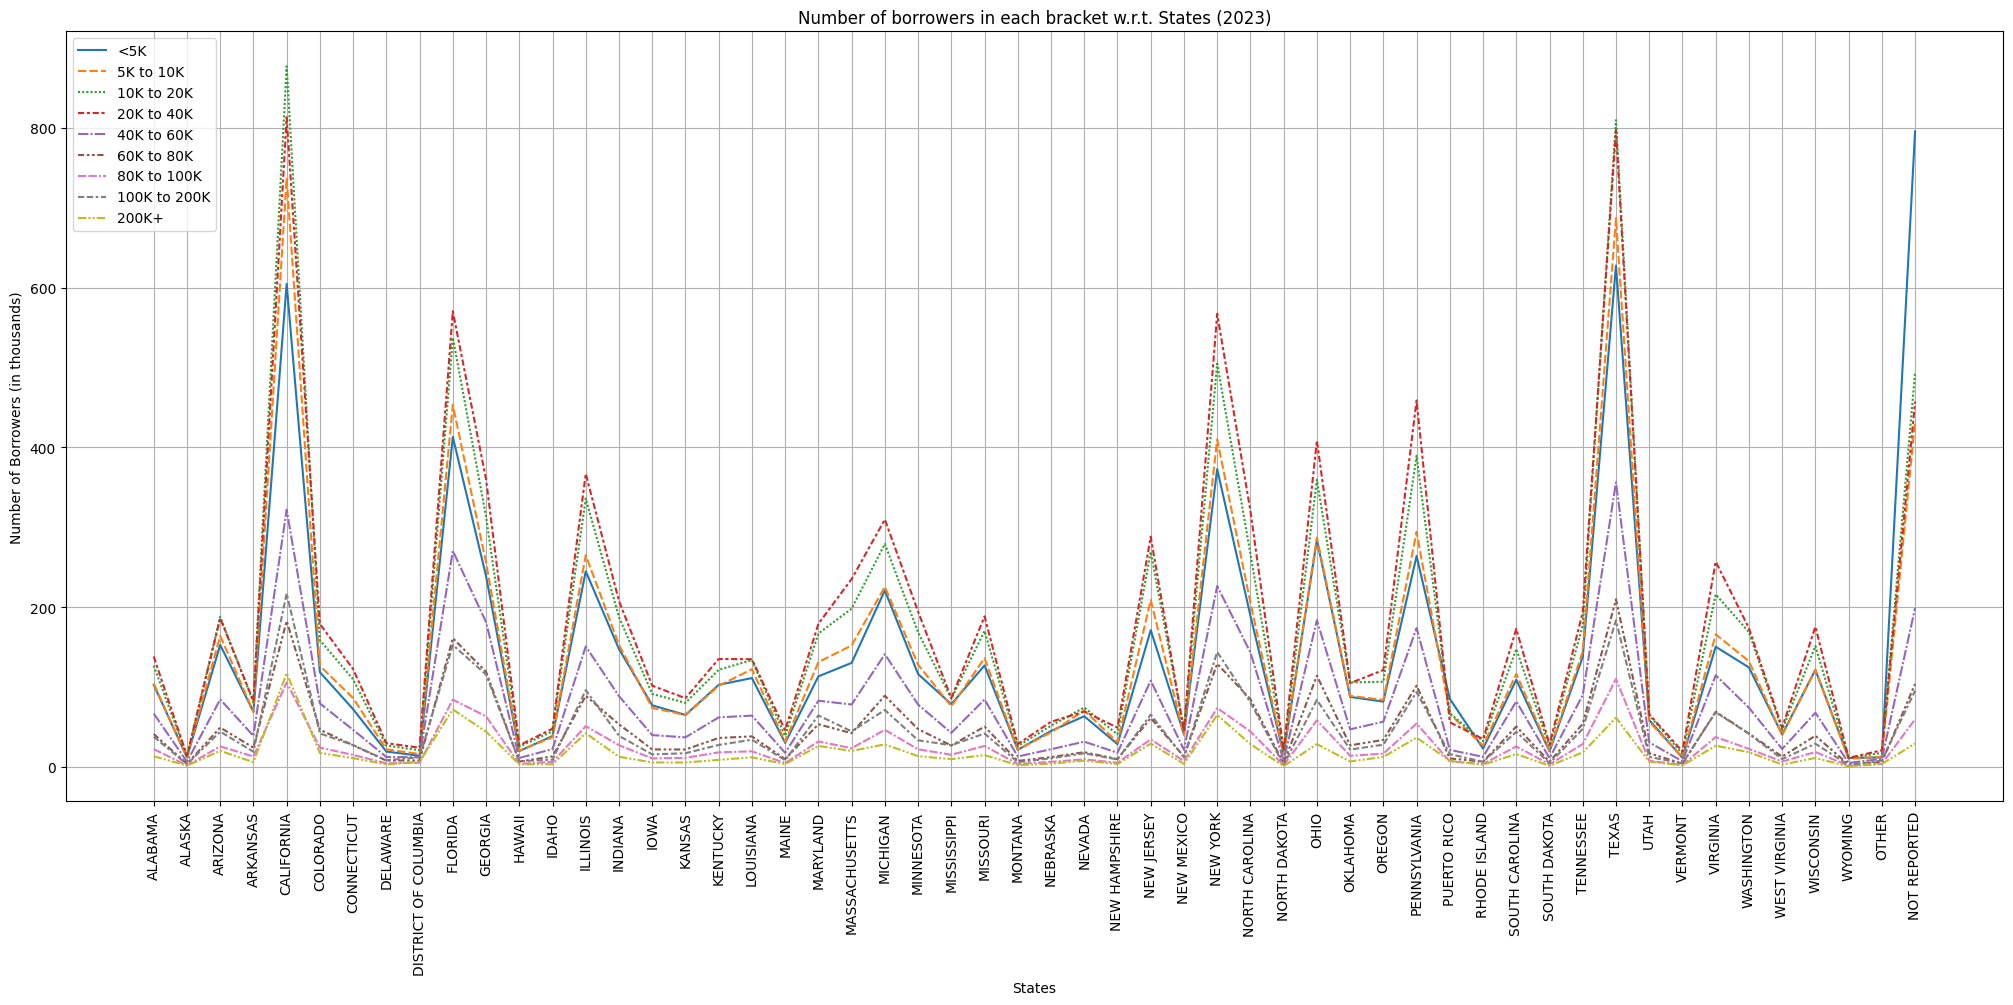

In [254]:
plt.figure(figsize=(25, 10))
sns.lineplot(data=borrowers_df)
plt.title("Number of borrowers in each bracket w.r.t. States (2023)")
plt.xlabel("States")
plt.ylabel("Number of Borrowers (in thousands)")
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [255]:
import geopandas as gdp
test = "./States_shapefile-shp/States_shapefile.shp"
map_df = gdp.read_file(test)
map_df.head()

,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry
0,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
1,2,None,AK,ALASKA,N,920,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
2,3,AZURITE,AZ,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
3,4,PDS,AR,ARKANSAS,F,922,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
4,5,None,CA,CALIFORNIA,N,923,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."


In [256]:
# import sys
# !{sys.executable} -m pip install geopandas

<Axes: >

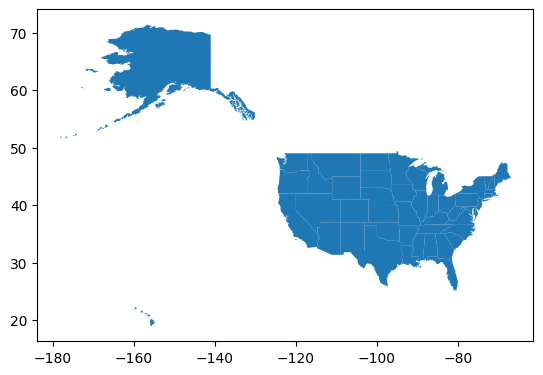

In [257]:
map_df.plot()

In [258]:
map_df.columns

Index(['FID', 'Program', 'State_Code', 'State_Name', 'Flowing_St', 'FID_1',
       'geometry'],
      dtype='object')

In [259]:
for id, i in enumerate(map_df['State_Name']):
    map_df.loc[id,0] = i[0] + i[1:]

In [260]:
state_map_df = map_df.drop(columns=['Program','FID','State_Code','Flowing_St','FID_1', 'State_Name']).set_index(0)

/tmp/ipykernel_4578/790736063.py:7: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


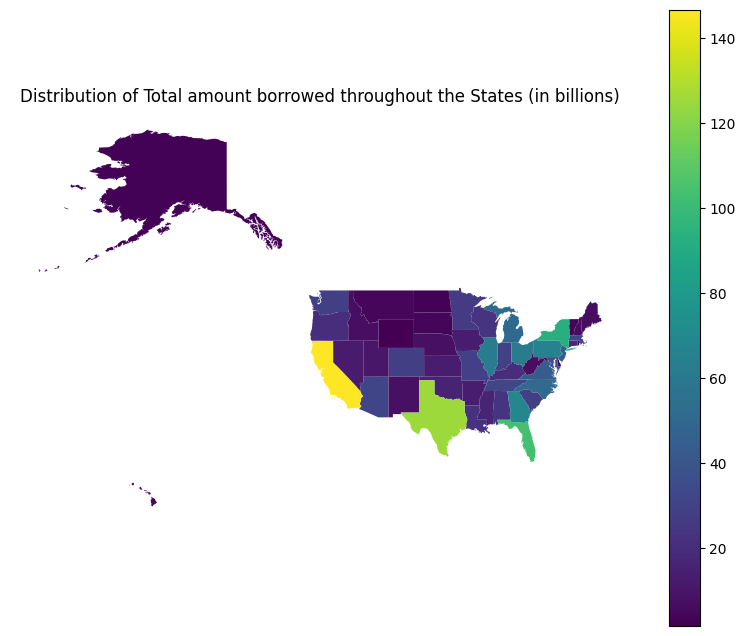

In [261]:
merged_amt = state_map_df.join(total_amt_df)
amts = list(merged_amt[0])
fig, ax = plt.subplots(1, figsize=(10, 8))
merged_amt.plot(column=0, ax=ax)
ax.set_title("Distribution of Total amount borrowed throughout the States (in billions)")
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=min(amts), vmax=max(amts)))
cbar = fig.colorbar(sm)
ax.axis('off')
plt.show()

/tmp/ipykernel_4578/2419556537.py:7: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


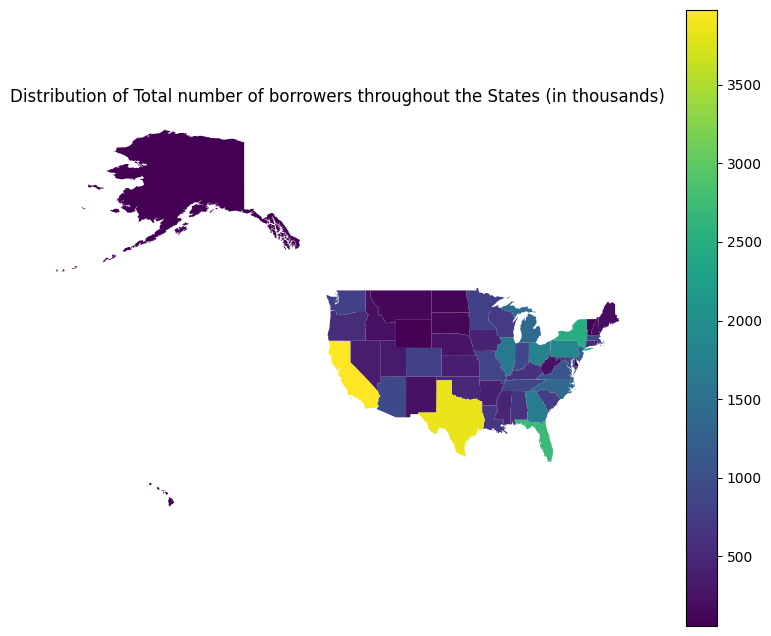

In [262]:
merged_borr = state_map_df.join(total_borrowers_df)
borrs = list(merged_borr[0])
fig, ax = plt.subplots(1, figsize=(10, 8))
merged_borr.plot(column=0, ax=ax)
ax.set_title("Distribution of Total number of borrowers throughout the States (in thousands)")
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=min(borrs), vmax=max(borrs)))
cbar = fig.colorbar(sm)
ax.axis('off')
plt.show()